In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(42)

In [2]:
iris_data = load_iris() 
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

/home/havish/.local/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
def relu(x):
    x[x<0]=0
    return x
def softmax(arr):
#     arr = arr/np.max(arr)
    return np.exp(arr)/(np.sum(np.exp(arr),axis=0))
def diff_relu(arr):
    z = np.zeros(arr.shape)
    z[arr<=0] = 0
    z[arr>0] = 1
    return z

In [4]:
def initializer(fan_out,fan_in):
    limit = np.sqrt(2*1.0/(fan_in+fan_out))
#     return np.random.uniform(-limit,limit,(fan_out,fan_in))
    return np.random.normal(0,limit,(fan_out,fan_in))

In [5]:
### architecture ###
in_dim = 4
hid1_dim = 10
hid2_dim = 10
out_dim = 3
W1 = initializer(hid1_dim,in_dim)
b1 = initializer(hid1_dim,1)
W2 = initializer(hid2_dim,hid1_dim)
b2 = initializer(hid2_dim,1)
W3 = initializer(out_dim,hid2_dim)
b3 = initializer(out_dim,1)

In [6]:
epochs = 500
num_samples = len(train_x)
batch_size = 10
delta_const = 1e-10
num_batches = num_samples/batch_size
eps = 1e-3
loss1 = []
r = {"W1" : np.zeros(W1.shape) , "W2" : np.zeros(W2.shape) ,"W3" : np.zeros(W3.shape),"b1": np.zeros(b1.shape)
     ,"b2" :np.zeros(b2.shape) , "b3" : np.zeros(b3.shape)}
for i in range(epochs):
    (x_train_subs,y_train_subs) = shuffle(train_x,train_y,random_state = 40)
    loss = 0
    for j in range(int(num_batches)):
        W1_upd = np.zeros((hid1_dim,in_dim))
        b1_upd = np.zeros((hid1_dim,1))
        W2_upd = np.zeros((hid2_dim,hid1_dim))
        b2_upd = np.zeros((hid2_dim,1))
        W3_upd = np.zeros((out_dim,hid2_dim))
        b3_upd = np.zeros((out_dim,1))
        for k in range(batch_size):
            x1 = np.matmul(W1,x_train_subs[j*batch_size+k]).reshape(-1,1)+b1
            z1 = relu(x1)
            
            x2 = np.matmul(W2,z1).reshape(-1,1)+b2
            z2 = relu(x2)

            out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
        
            loss = loss + -np.log(out[np.argmax(y_train_subs[j*batch_size+k])])
        
            del_3 = out - y_train_subs[j*batch_size+k].reshape(-1,1)
            del_2 = np.matmul(W3.T,del_3)*diff_relu(x2)
            del_1 = np.matmul(W2.T,del_2)*diff_relu(x1)

            b3_upd += del_3
#         b3_upd = b3_upd.reshape(len(b3),1)
            b2_upd += del_2
#         b2_upd = b2_upd.reshape(len(b2),1)
            b1_upd += del_1
#         b1_upd = b1_upd.reshape(len(b1),1)
            W3_upd += np.matmul(del_3,z2.T)
            W2_upd += np.matmul(del_2,z1.T)
            W1_upd += np.matmul(del_1,x_train_subs[j*batch_size+k].reshape(-1,1).T)
        r["W1"] = r["W1"] + W1_upd*W1_upd
        r["W2"] = r["W2"] + W2_upd*W2_upd
        r["W3"] = r["W3"] + W3_upd*W3_upd
        r["b1"] = r["b1"] + b1_upd*b1_upd
        r["b2"] = r["b2"] + b2_upd*b2_upd
        r["b3"] = r["b3"] + b3_upd*b3_upd
        W3 = W3 - (eps*W3_upd)/(delta_const + np.sqrt(r["W3"]))
        W2 = W2 - (eps*W2_upd)/(delta_const + np.sqrt(r["W2"]))
        W1 = W1 - (eps*W1_upd)/(delta_const + np.sqrt(r["W1"]))
        b3 = b3 - (eps*b3_upd)/(delta_const + np.sqrt(r["b3"]))
        b2 = b2 - (eps*b2_upd)/(delta_const + np.sqrt(r["b2"]))
        b1 = b1 - (eps*b1_upd)/(delta_const + np.sqrt(r["b1"]))
    loss1.append(loss)
    print("Epoch: " + str(i) + " Loss: " + str(loss))

Epoch: 0 Loss: [254.05074174]
Epoch: 1 Loss: [245.94738032]
Epoch: 2 Loss: [240.96919308]
Epoch: 3 Loss: [237.0269772]
Epoch: 4 Loss: [233.61281737]
Epoch: 5 Loss: [230.39060798]
Epoch: 6 Loss: [227.18021296]
Epoch: 7 Loss: [223.80582728]
Epoch: 8 Loss: [220.61158864]
Epoch: 9 Loss: [217.69403359]
Epoch: 10 Loss: [214.96063197]
Epoch: 11 Loss: [212.37124418]
Epoch: 12 Loss: [209.88387659]
Epoch: 13 Loss: [207.51551927]
Epoch: 14 Loss: [205.23946526]
Epoch: 15 Loss: [203.03317137]
Epoch: 16 Loss: [200.88245143]
Epoch: 17 Loss: [198.80644059]
Epoch: 18 Loss: [196.79215449]
Epoch: 19 Loss: [194.8256744]
Epoch: 20 Loss: [192.91323419]
Epoch: 21 Loss: [191.04121613]
Epoch: 22 Loss: [189.21656254]
Epoch: 23 Loss: [187.44110805]
Epoch: 24 Loss: [185.71296236]
Epoch: 25 Loss: [184.02890732]
Epoch: 26 Loss: [182.42144034]
Epoch: 27 Loss: [180.86664369]
Epoch: 28 Loss: [179.37592133]
Epoch: 29 Loss: [177.96390842]
Epoch: 30 Loss: [176.60958579]
Epoch: 31 Loss: [175.30997482]
Epoch: 32 Loss: [174

Epoch: 284 Loss: [61.15473045]
Epoch: 285 Loss: [61.05217514]
Epoch: 286 Loss: [60.95043951]
Epoch: 287 Loss: [60.84951621]
Epoch: 288 Loss: [60.74937881]
Epoch: 289 Loss: [60.65020883]
Epoch: 290 Loss: [60.55243758]
Epoch: 291 Loss: [60.45539384]
Epoch: 292 Loss: [60.35912379]
Epoch: 293 Loss: [60.26355941]
Epoch: 294 Loss: [60.17014514]
Epoch: 295 Loss: [60.07745186]
Epoch: 296 Loss: [59.98545221]
Epoch: 297 Loss: [59.89416214]
Epoch: 298 Loss: [59.80417447]
Epoch: 299 Loss: [59.7151161]
Epoch: 300 Loss: [59.626726]
Epoch: 301 Loss: [59.53889156]
Epoch: 302 Loss: [59.45180992]
Epoch: 303 Loss: [59.36550118]
Epoch: 304 Loss: [59.27990655]
Epoch: 305 Loss: [59.1951467]
Epoch: 306 Loss: [59.11101414]
Epoch: 307 Loss: [59.02746614]
Epoch: 308 Loss: [58.94448761]
Epoch: 309 Loss: [58.86205192]
Epoch: 310 Loss: [58.78016136]
Epoch: 311 Loss: [58.69899218]
Epoch: 312 Loss: [58.61853743]
Epoch: 313 Loss: [58.53860033]
Epoch: 314 Loss: [58.4591724]
Epoch: 315 Loss: [58.38024541]
Epoch: 316 Lo

In [7]:
z1 = relu(np.matmul(W1,test_x[4]).reshape(-1,1)+b1)
z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)

In [8]:
print(out)

[[0.06563857]
 [0.5422151 ]
 [0.39214633]]


In [9]:
print(test_y[4])

[0. 1. 0.]


In [10]:
preds = []
true = []
# print(np.argmax(out))
for i in range(len(test_x)):
    z1 = relu(np.matmul(W1,test_x[i]).reshape(-1,1)+b1)
    z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
    out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
    preds.append(np.argmax(out))
    true.append(np.argmax(test_y[i]))

In [11]:
print(preds)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


In [12]:
print(true)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


In [13]:
acc =accuracy_score(y_pred=preds,y_true=true)
print(acc)

1.0


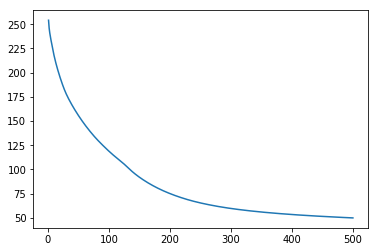

In [14]:
epochs = np.arange(1,501)
plt.plot(epochs,loss1)
plt.show()

In [15]:
for elem in np.array(loss1):
    print(str(elem[0])+',' , end = '')

254.0507417397732,245.94738032491347,240.9691930821415,237.02697719947142,233.61281737285796,230.39060797541967,227.18021295835712,223.80582728183649,220.61158863643806,217.6940335931709,214.96063196962209,212.37124418425583,209.88387659457885,207.51551926633564,205.23946526393604,203.03317136768928,200.88245143287742,198.80644058508497,196.79215449318656,194.82567439905816,192.91323419025372,191.04121613269874,189.21656253644448,187.44110805483618,185.71296236210392,184.02890732047655,182.42144034370355,180.86664369270233,179.37592133360957,177.96390841895564,176.60958578822726,175.30997482287054,174.049518286493,172.81682878139907,171.6119761114154,170.43394078417336,169.27670957547397,168.1343268540554,167.01263823117125,165.90556143482073,164.81925097370862,163.75743559828152,162.70654320042428,161.66935405309945,160.64628395506398,159.6349519740051,158.6347774647944,157.64617045463635,156.66930734412279,155.70531235185842,154.74909754858723,153.8062761048974,152.87321616741633,151